In [4]:
import os
seed = 10
os.environ['PYTHONHASHSEED']=str(seed)

In [5]:
import requests
import lxml
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.utils import compute_class_weight
import tensorflow as tf
from pil import Image
from sklearn import preprocessing
import tensorflow_addons as tfa

count = 0

In [6]:
seed = 10
df = pd.read_csv("data/cyclic_tickers/initial_indicators/ANF_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,21.5000,24.211693,-82.142857,-6805500.0,2.0
2000-01-24,20.2500,23.602201,-92.465753,-8986800.0,1.0
2000-01-25,20.1875,23.076863,-92.307692,-11383100.0,2.0
2000-01-26,20.8750,22.738115,-82.786885,-9392500.0,2.0
2000-01-27,22.8750,22.759174,-56.557377,-6811000.0,2.0


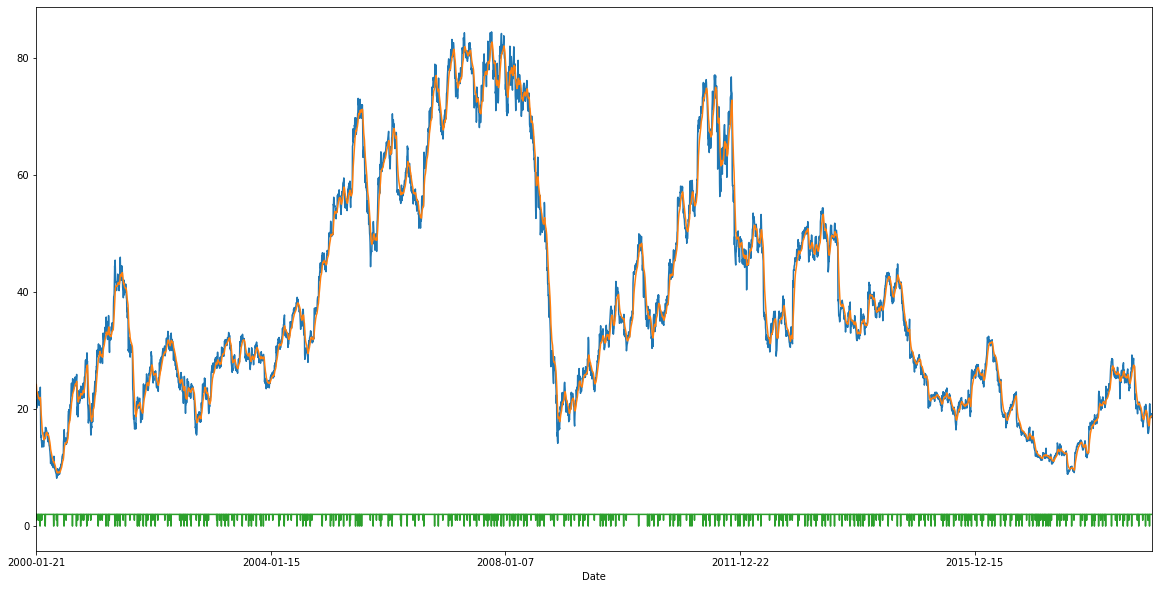

In [7]:
#%matplotlib notebook
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

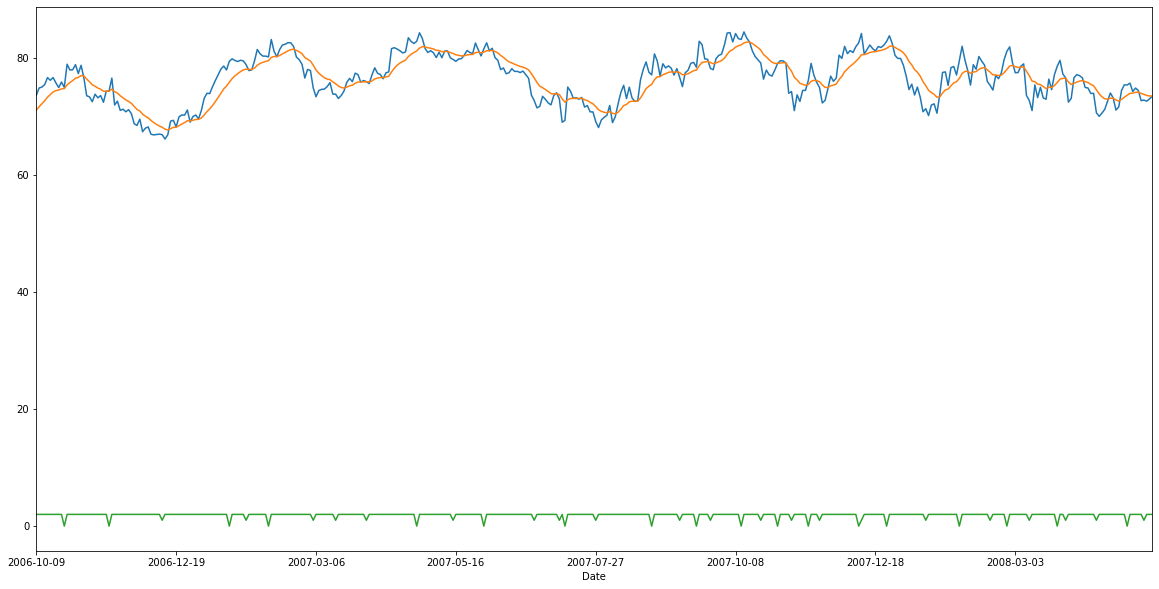

In [8]:
df = df.loc['2006-10-09':'2008-05-12']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [9]:
df.to_csv('distribution phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [10]:
acc_df = df
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 2006-10-09 to 2008-05-12
Data columns (total 5 columns):
previous_1d    400 non-null float64
EMA_12         400 non-null float64
willr_14       400 non-null float64
OBV_7          400 non-null float64
labels         400 non-null float64
dtypes: float64(5)
memory usage: 18.8+ KB


In [11]:
seed = 10
df = pd.read_csv("data/cyclic_tickers/initial_indicators/BA_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,46.5000,43.946622,-19.402985,20099500.0,2.0
2000-01-24,45.6875,44.214450,-29.104478,15707000.0,2.0
2000-01-25,44.3125,44.229534,-45.522388,12400800.0,2.0
2000-01-26,45.6875,44.453837,-34.821429,17458000.0,2.0
2000-01-27,46.1875,44.720554,-27.678571,20548100.0,2.0


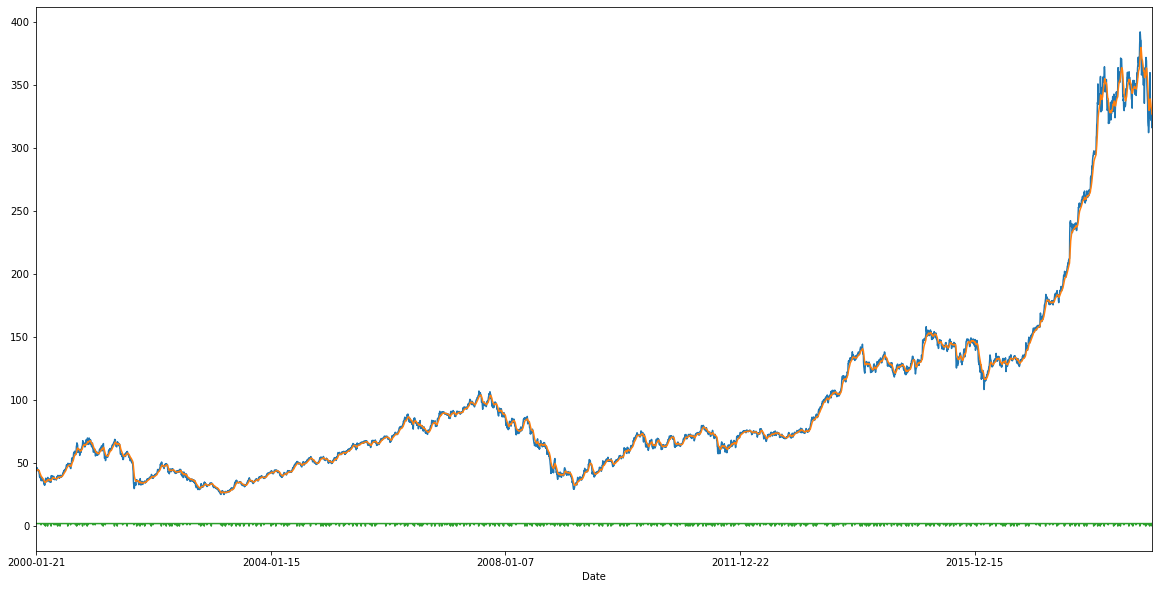

In [12]:
#%matplotlib notebook
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

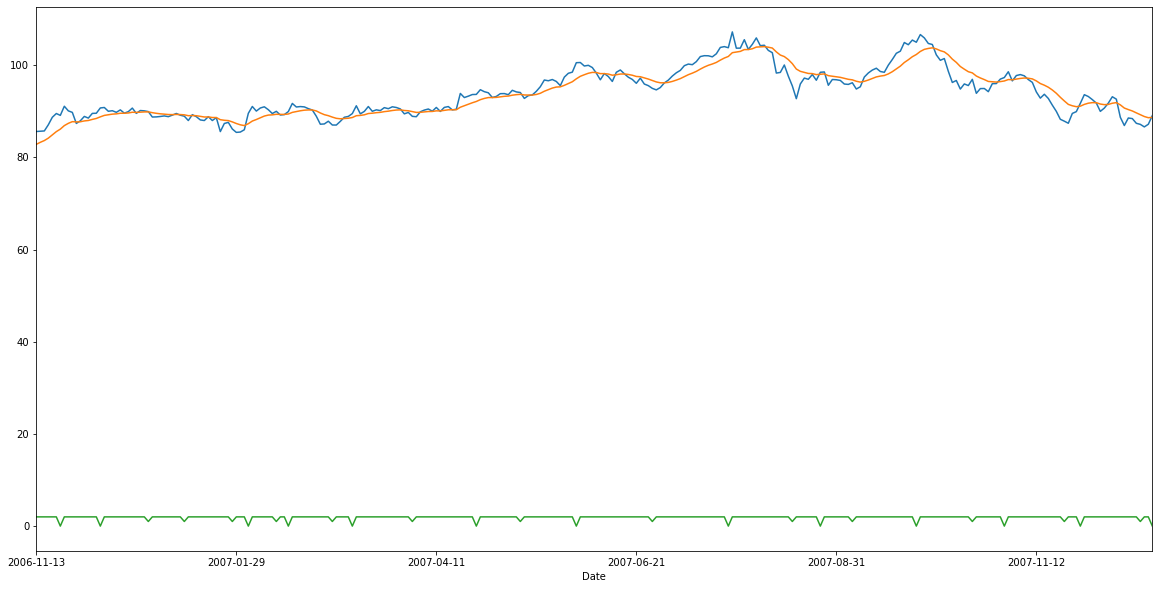

In [13]:
df = df.loc['2006-11-13':'2007-12-24']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [14]:
df.to_csv('distribution phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [15]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 680 entries, 2006-10-09 to 2007-12-24
Data columns (total 5 columns):
previous_1d    680 non-null float64
EMA_12         680 non-null float64
willr_14       680 non-null float64
OBV_7          680 non-null float64
labels         680 non-null float64
dtypes: float64(5)
memory usage: 31.9+ KB


In [16]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/600104.SS_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-24,3.189194,3.249583,-69.696967,61394527.0,2.0
2000-01-25,3.205140,3.242745,-79.136806,75032521.0,2.0
2000-01-26,3.402870,3.267380,-34.532549,127274101.0,2.0
2000-01-27,3.284870,3.270071,-62.500055,91746305.0,2.0
2000-01-28,3.252978,3.267441,-69.852957,65314909.0,2.0


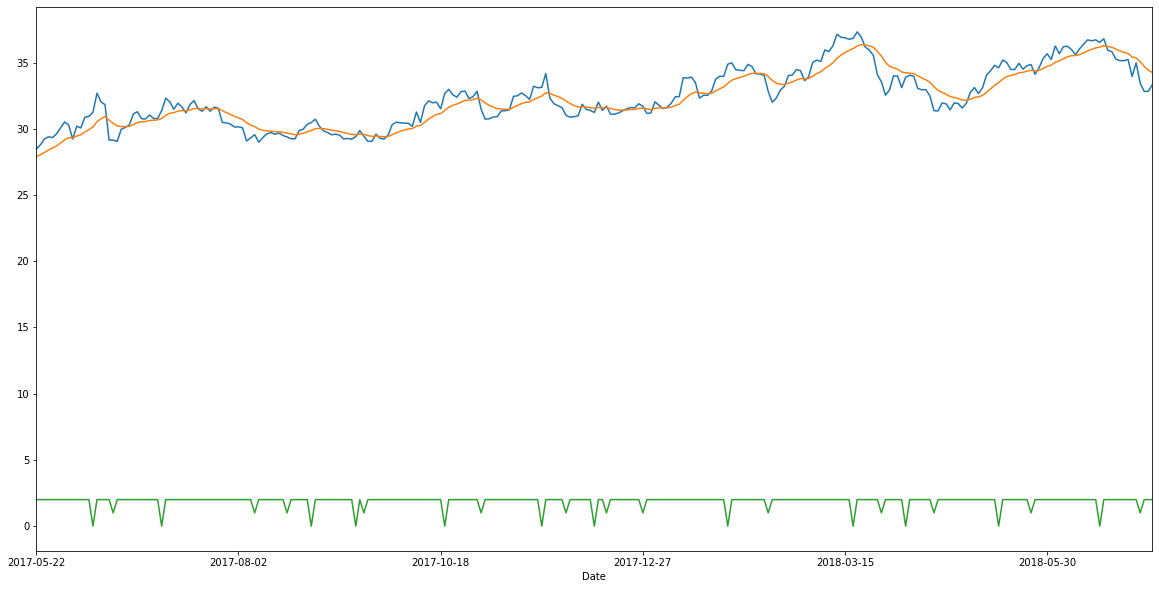

In [17]:
df = df.loc['2017-05-21':'2018-07-08']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [18]:
df.to_csv('distribution phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [19]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 957 entries, 2006-10-09 to 2018-07-06
Data columns (total 5 columns):
previous_1d    957 non-null float64
EMA_12         957 non-null float64
willr_14       957 non-null float64
OBV_7          957 non-null float64
labels         957 non-null float64
dtypes: float64(5)
memory usage: 44.9+ KB


In [20]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/O39.SI_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,6.793788,7.018572,-90.000010,-1965914.0,2.0
2000-01-24,6.890842,6.998922,-77.777802,6276910.0,2.0
2000-01-25,6.793788,6.967363,-85.714286,-511055.0,2.0
2000-01-26,6.745261,6.933193,-86.666549,-7435027.0,2.0
2000-01-27,6.890842,6.926678,-66.666601,-3725757.0,2.0


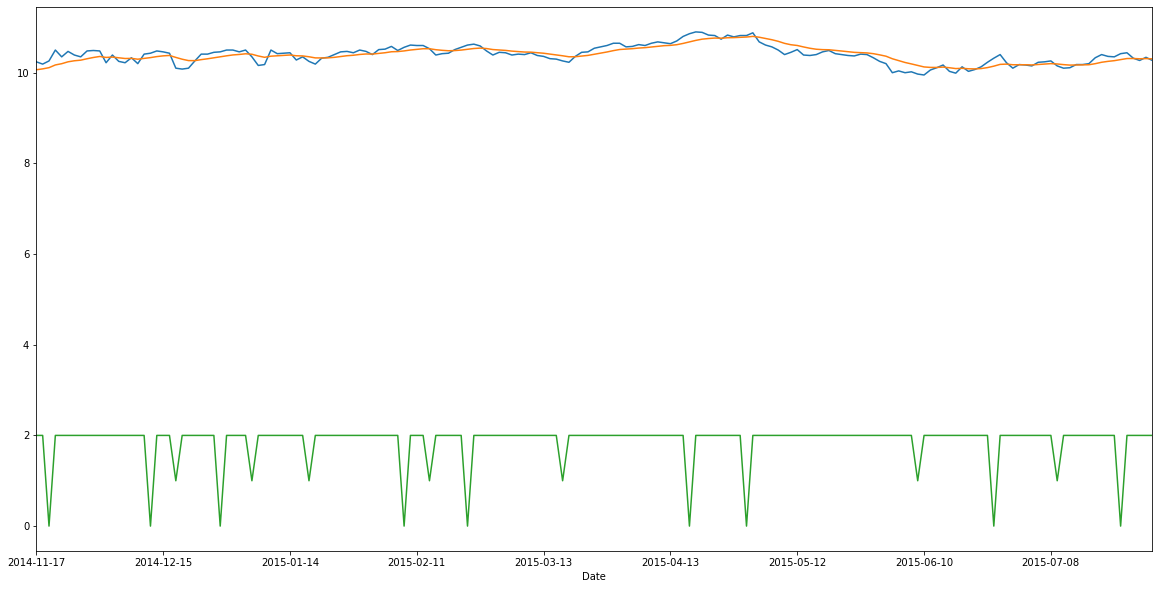

In [21]:
df = df.loc['2014-11-16':'2015-08-02']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [22]:
df.to_csv('distribution phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [23]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1134 entries, 2006-10-09 to 2015-07-31
Data columns (total 5 columns):
previous_1d    1134 non-null float64
EMA_12         1134 non-null float64
willr_14       1134 non-null float64
OBV_7          1134 non-null float64
labels         1134 non-null float64
dtypes: float64(5)
memory usage: 53.2+ KB


In [24]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/C_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,439.570312,417.946098,-14.264706,3317480.0,2.0
2000-01-24,423.281250,418.766891,-34.705882,1769520.0,2.0
2000-01-25,413.906250,418.019100,-46.470588,626307.0,2.0
2000-01-26,419.062500,418.179623,-40.000000,2168174.0,2.0
2000-01-27,435.937500,420.911604,-22.535211,3502561.0,2.0


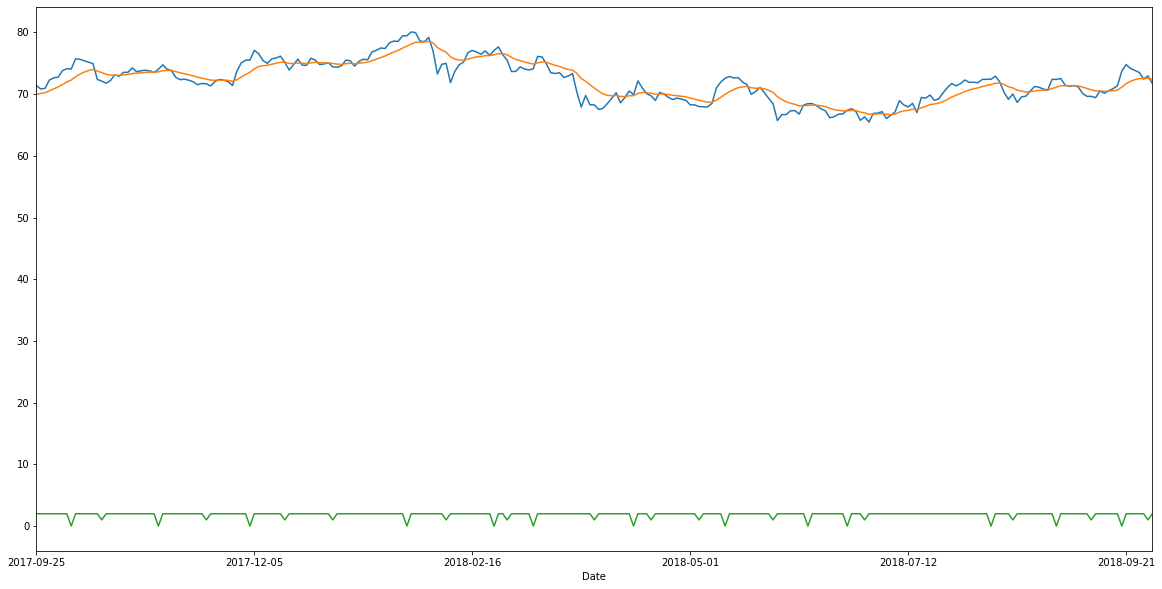

In [25]:
df = df.loc['2017-09-25':'2018-10-01']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [26]:
df.to_csv('distribution phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [27]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1391 entries, 2006-10-09 to 2018-10-01
Data columns (total 5 columns):
previous_1d    1391 non-null float64
EMA_12         1391 non-null float64
willr_14       1391 non-null float64
OBV_7          1391 non-null float64
labels         1391 non-null float64
dtypes: float64(5)
memory usage: 65.2+ KB


In [28]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/C6L.SI_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,19.000000,19.215335,-37.499990,388000.0,2.0
2000-01-24,18.400000,19.089899,-50.000000,-2311000.0,2.0
2000-01-25,18.100000,18.937607,-48.780483,-3542000.0,2.0
2000-01-26,17.700001,18.747206,-85.714237,-6261000.0,2.0
2000-01-27,17.799999,18.601482,-82.142864,-4565000.0,2.0


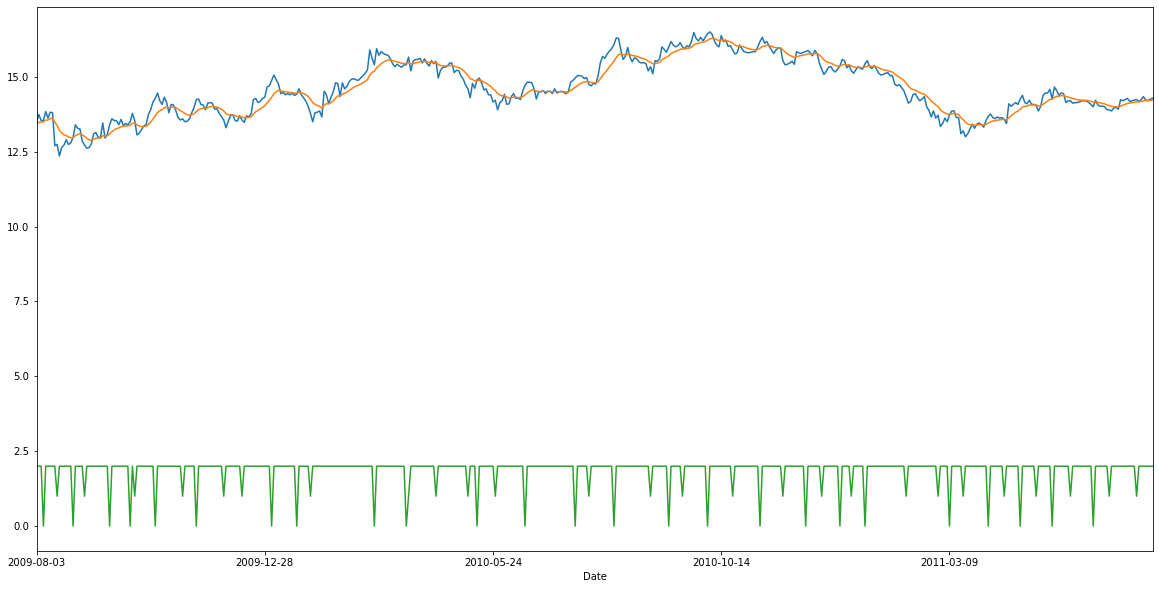

In [29]:
df = df.loc['2009-08-02':'2011-07-17']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [30]:
df.to_csv('distribution phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [31]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1881 entries, 2006-10-09 to 2011-07-15
Data columns (total 5 columns):
previous_1d    1881 non-null float64
EMA_12         1881 non-null float64
willr_14       1881 non-null float64
OBV_7          1881 non-null float64
labels         1881 non-null float64
dtypes: float64(5)
memory usage: 88.2+ KB


In [32]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/GS_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,85.9375,85.447978,-53.992395,1493500.0,2.0
2000-01-24,85.6875,85.484828,-54.296875,951000.0,1.0
2000-01-25,81.7500,84.910239,-69.318182,238100.0,2.0
2000-01-26,83.8750,84.750971,-50.000000,987400.0,2.0
2000-01-27,88.2500,85.289283,-10.465116,2074000.0,2.0


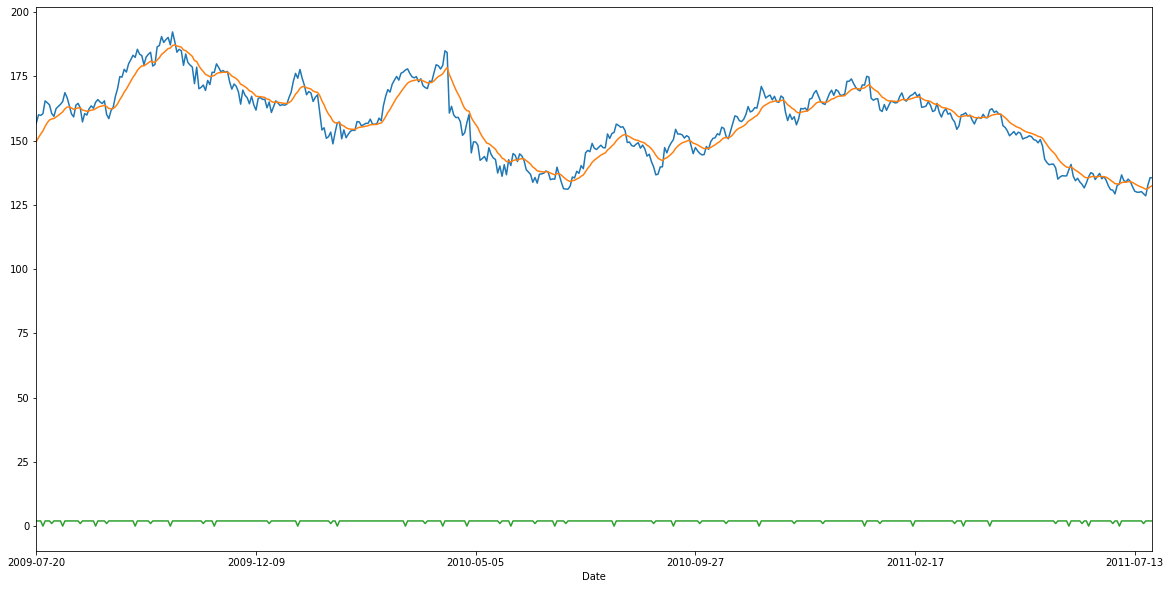

In [33]:
df = df.loc['2009-07-20':'2011-07-25']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [34]:
df.to_csv('distribution phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [35]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2390 entries, 2006-10-09 to 2011-07-25
Data columns (total 5 columns):
previous_1d    2390 non-null float64
EMA_12         2390 non-null float64
willr_14       2390 non-null float64
OBV_7          2390 non-null float64
labels         2390 non-null float64
dtypes: float64(5)
memory usage: 112.0+ KB


In [36]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/GS_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,85.9375,85.447978,-53.992395,1493500.0,2.0
2000-01-24,85.6875,85.484828,-54.296875,951000.0,1.0
2000-01-25,81.7500,84.910239,-69.318182,238100.0,2.0
2000-01-26,83.8750,84.750971,-50.000000,987400.0,2.0
2000-01-27,88.2500,85.289283,-10.465116,2074000.0,2.0


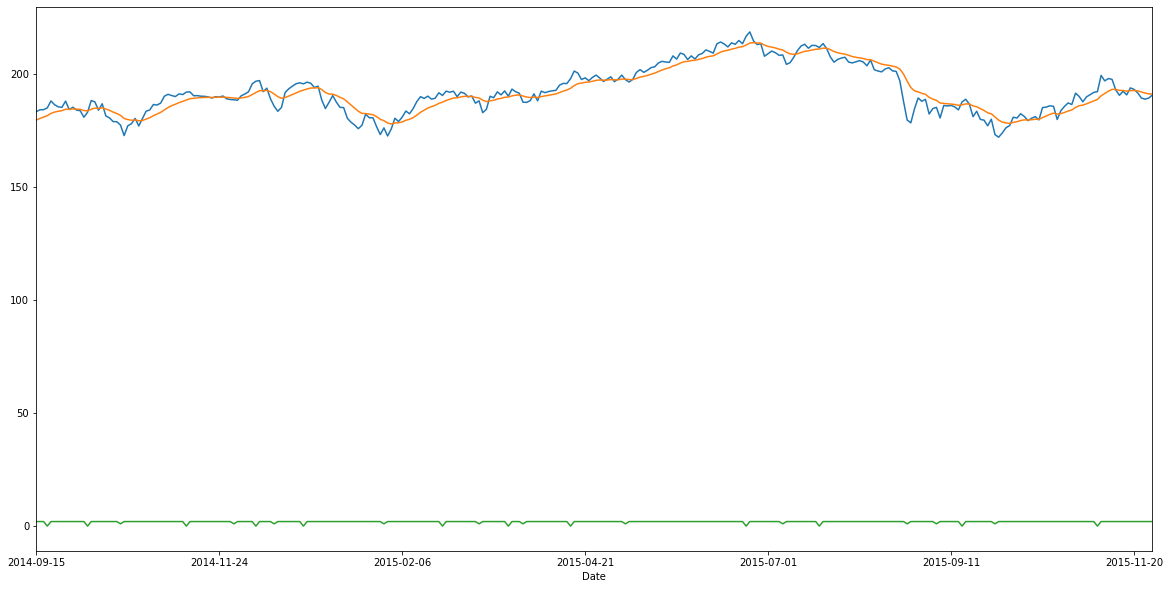

In [37]:
df = df.loc['2014-09-15':'2015-11-30']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [38]:
df.to_csv('distribution phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [39]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2696 entries, 2006-10-09 to 2015-11-30
Data columns (total 5 columns):
previous_1d    2696 non-null float64
EMA_12         2696 non-null float64
willr_14       2696 non-null float64
OBV_7          2696 non-null float64
labels         2696 non-null float64
dtypes: float64(5)
memory usage: 126.4+ KB


In [40]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/0883.HK_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2004-04-07,3.250,3.264699,-57.142857,31539206.0,2.0
2004-04-08,3.200,3.254745,-78.947368,-24878594.0,2.0
2004-04-13,3.250,3.254015,-52.631579,10937473.0,0.0
2004-04-14,3.375,3.272628,-10.416706,98972973.0,2.0
2004-04-15,3.275,3.272993,-52.083331,47190715.0,2.0


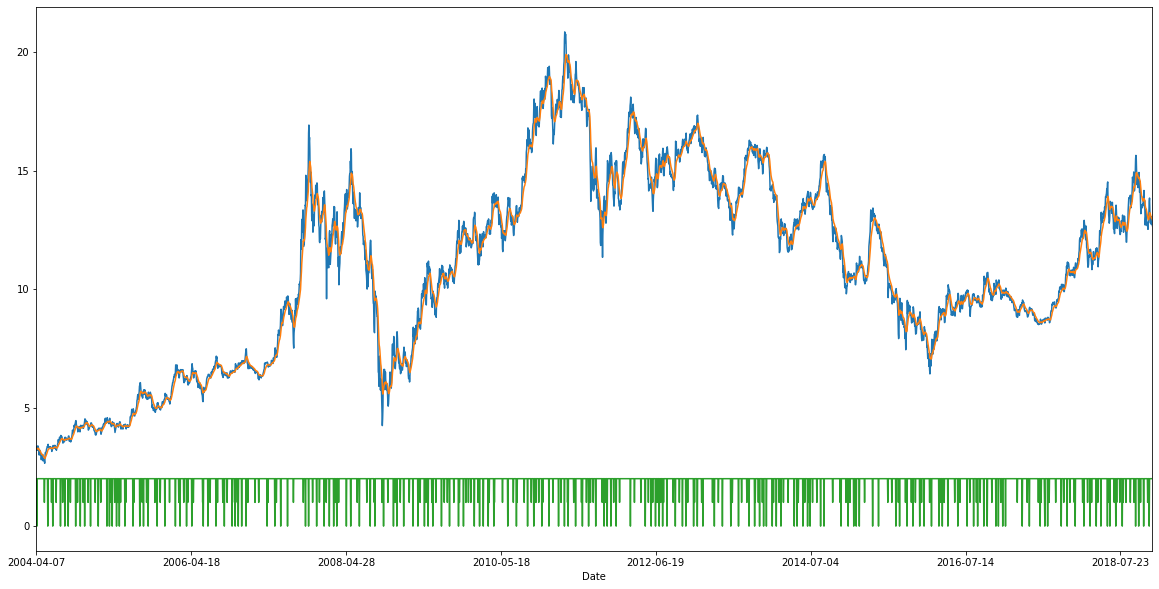

In [41]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

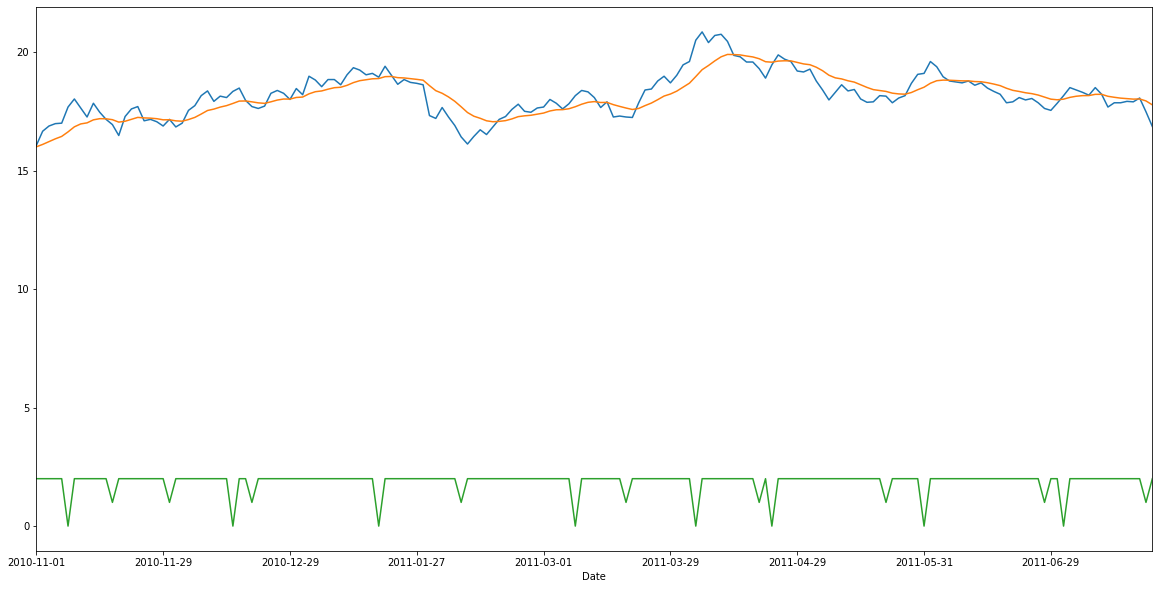

In [42]:
df = df.loc['2010-10-31':'2011-07-24']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [43]:
df.to_csv('distribution phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [44]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2873 entries, 2006-10-09 to 2011-07-22
Data columns (total 5 columns):
previous_1d    2873 non-null float64
EMA_12         2873 non-null float64
willr_14       2873 non-null float64
OBV_7          2873 non-null float64
labels         2873 non-null float64
dtypes: float64(5)
memory usage: 134.7+ KB


In [45]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/0883.HK_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2004-04-07,3.250,3.264699,-57.142857,31539206.0,2.0
2004-04-08,3.200,3.254745,-78.947368,-24878594.0,2.0
2004-04-13,3.250,3.254015,-52.631579,10937473.0,0.0
2004-04-14,3.375,3.272628,-10.416706,98972973.0,2.0
2004-04-15,3.275,3.272993,-52.083331,47190715.0,2.0


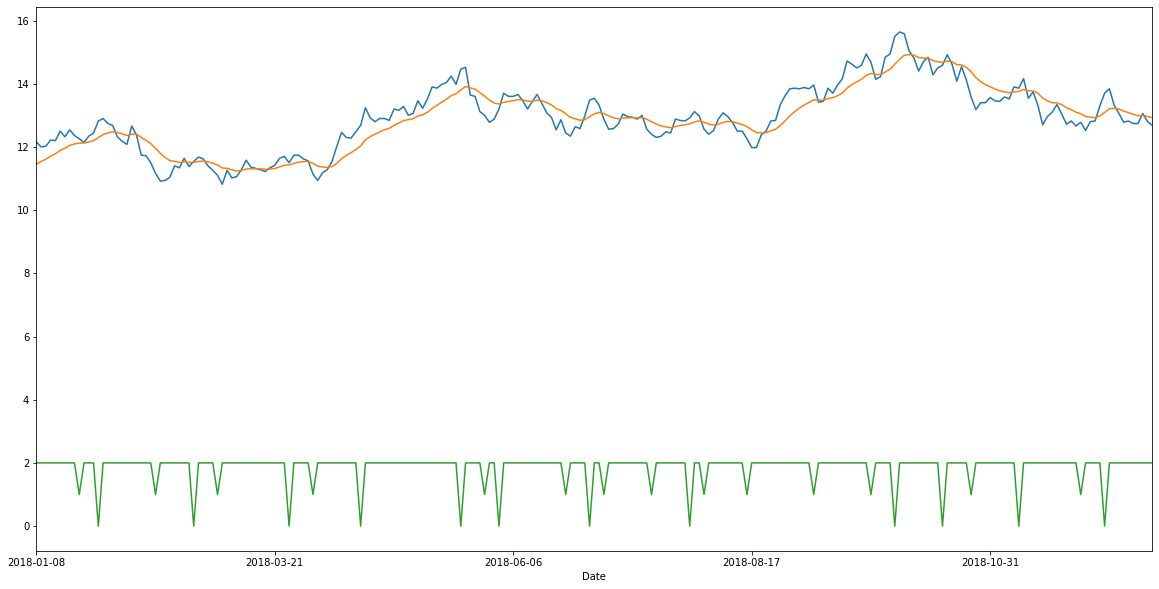

In [46]:
df = df.loc['2018-01-07':'2019-01-01']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [47]:
df.to_csv('distribution phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [48]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3108 entries, 2006-10-09 to 2018-12-18
Data columns (total 5 columns):
previous_1d    3108 non-null float64
EMA_12         3108 non-null float64
willr_14       3108 non-null float64
OBV_7          3108 non-null float64
labels         3108 non-null float64
dtypes: float64(5)
memory usage: 145.7+ KB


In [49]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/1398.HK_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2006-11-17,3.953848,3.652647,-15.942120,1.897904e+10,2.0
2006-11-20,3.934226,3.695967,-18.840636,1.837444e+10,2.0
2006-11-21,3.934226,3.732622,-19.403036,1.837444e+10,2.0
2006-11-22,3.934226,3.763638,-19.697025,1.837444e+10,0.0
2006-11-23,4.051959,3.807995,-1.562480,1.907354e+10,2.0


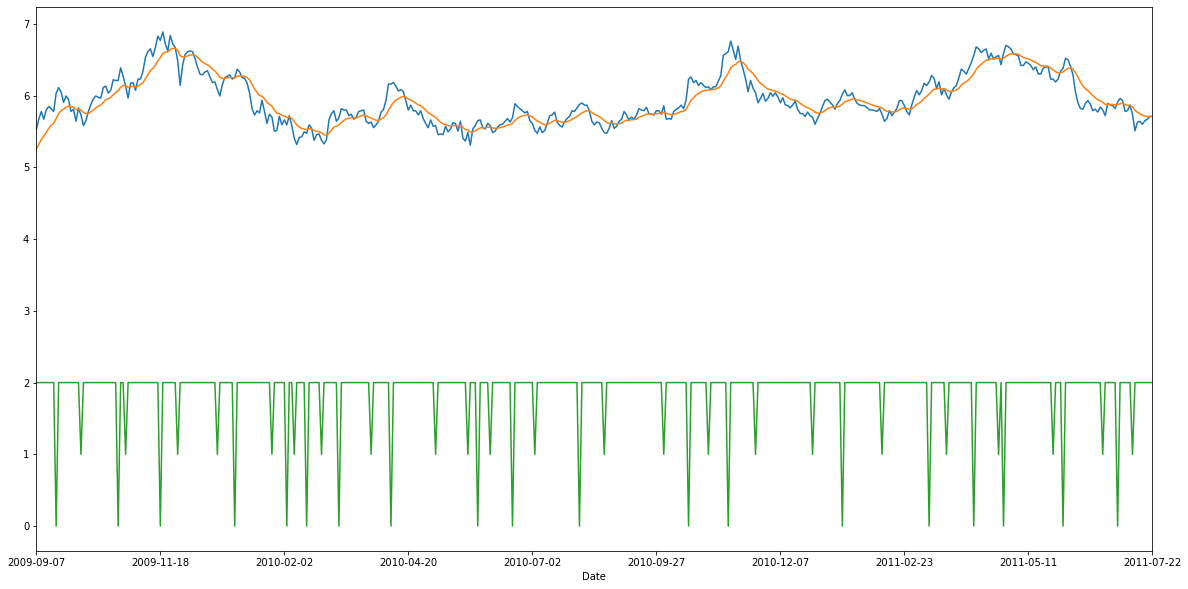

In [50]:
df = df.loc['2009-09-06':'2011-07-24']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [51]:
df.to_csv('distribution phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [52]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3559 entries, 2006-10-09 to 2011-07-22
Data columns (total 5 columns):
previous_1d    3559 non-null float64
EMA_12         3559 non-null float64
willr_14       3559 non-null float64
OBV_7          3559 non-null float64
labels         3559 non-null float64
dtypes: float64(5)
memory usage: 166.8+ KB


In [53]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/F_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,28.696527,28.933312,-60.897434,-10551829.0,2.0
2000-01-24,27.717651,28.746288,-97.435894,-19556923.0,2.0
2000-01-25,28.095465,28.646161,-83.333274,-11634726.0,2.0
2000-01-26,27.545919,28.476893,-83.505131,-18162314.0,1.0
2000-01-27,26.378138,28.154008,-91.269808,-32689253.0,2.0


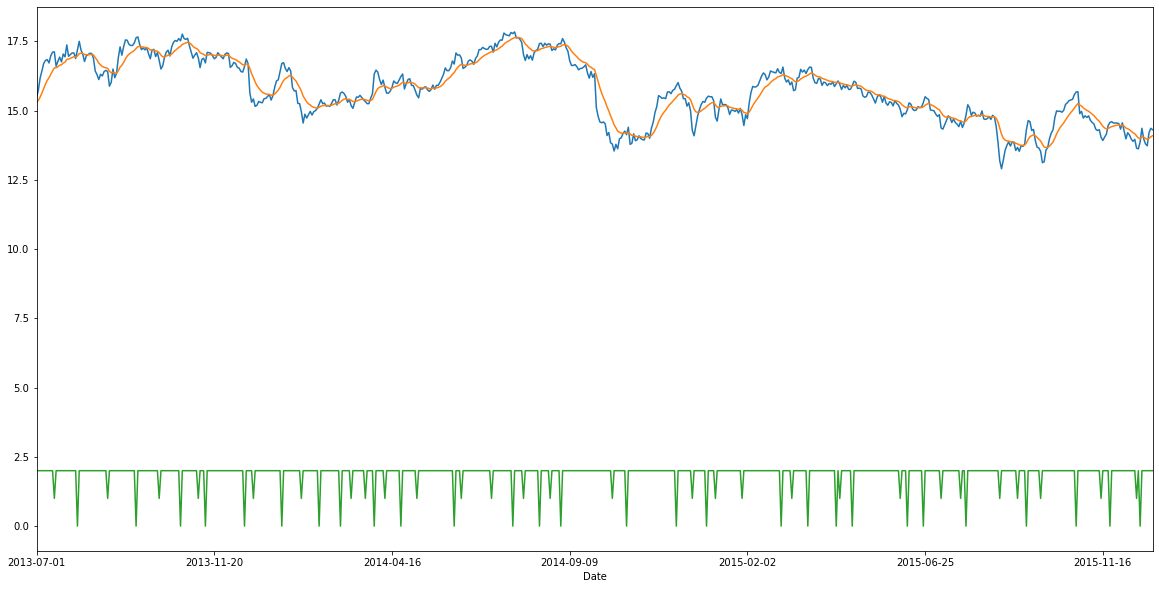

In [54]:
df = df.loc['2013-07-01':'2015-12-28']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [55]:
df.to_csv('distribution phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [56]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4188 entries, 2006-10-09 to 2015-12-28
Data columns (total 5 columns):
previous_1d    4188 non-null float64
EMA_12         4188 non-null float64
willr_14       4188 non-null float64
OBV_7          4188 non-null float64
labels         4188 non-null float64
dtypes: float64(5)
memory usage: 196.3+ KB


## Test Set

In [57]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/GS_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,85.9375,85.447978,-53.992395,1493500.0,2.0
2000-01-24,85.6875,85.484828,-54.296875,951000.0,1.0
2000-01-25,81.7500,84.910239,-69.318182,238100.0,2.0
2000-01-26,83.8750,84.750971,-50.000000,987400.0,2.0
2000-01-27,88.2500,85.289283,-10.465116,2074000.0,2.0


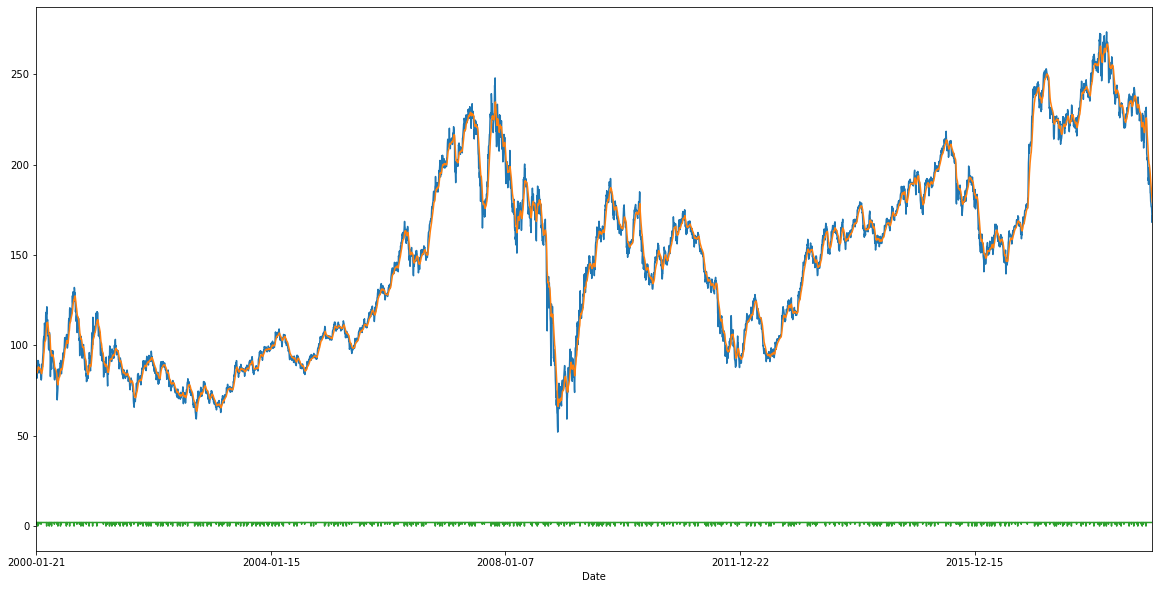

In [58]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

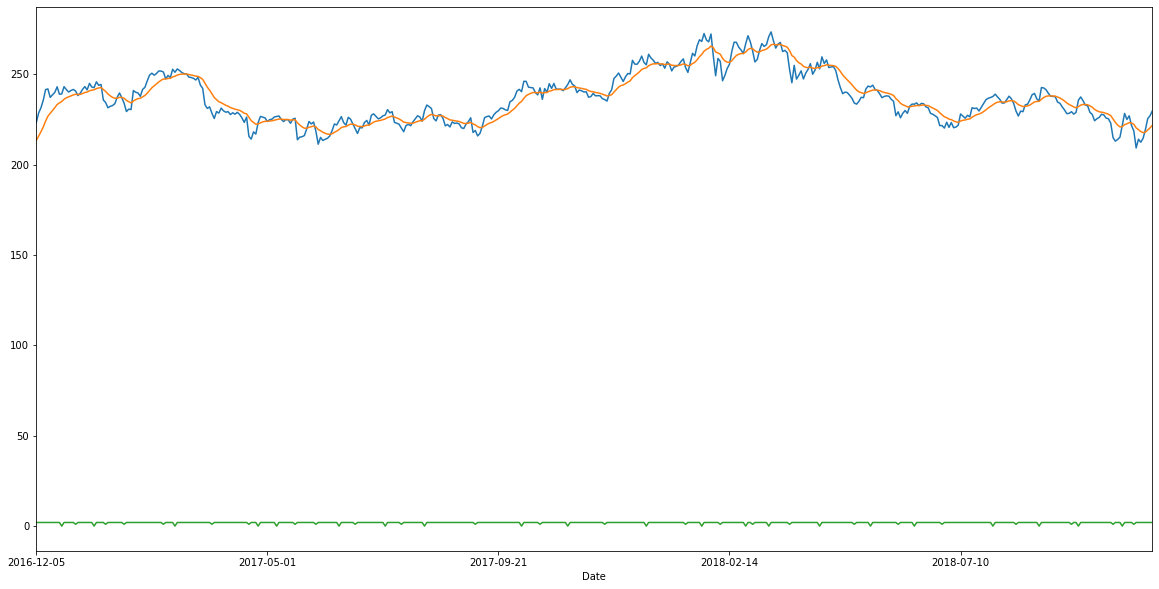

In [59]:
df = df.loc['2016-12-05':'2018-11-05']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [60]:
df.to_csv('distribution phase data/test_acc_data.csv')